<a href="https://colab.research.google.com/github/vaikunthcreates/TimeSeries/blob/main/Time_Series_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import necessary libraries
!pip install pymannkendall
import pandas as pd
import numpy as np
import datetime
import statsmodels.api as sm
import tensorflow as tf
import pymannkendall as mk
import math
import warnings
warnings.filterwarnings("ignore")
import itertools 
from fbprophet import Prophet
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.layers.core import Dense, Activation, Dropout
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error
import io
from google.colab import files


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#Upload file
uploaded = files.upload()
df= pd.read_excel(io.BytesIO(uploaded['Superstore.xlsx']))
df = df.rename(columns={'Sales':'Target'})
df.set_index('OrderDate',inplace=True) 
#Train-Test Split
#train,test = train_test_split(df,test_size=0.2,shuffle=False)

TypeError: ignored

In [ ]:
#df.set_index('OrderDate')
y = df.loc[df['Category'] == 'Technology']
y=y.groupby('OrderDate')['Target'].sum().reset_index()
y=y.set_index('OrderDate')

In [ ]:
train,test = train_test_split(df,test_size=0.2,shuffle=False)
test_or=test 

In [ ]:
y = y['Target'].resample('MS').mean()
y=pd.DataFrame(y)

In [ ]:
furniture = df.loc[df['Category'] == 'Furniture']
furniture = furniture.groupby('OrderDate')['Target'].sum().reset_index()
furniture = furniture.set_index('OrderDate')
furniture = furniture['Target'].resample('MS').mean()
furniture = pd.DataFrame({'OrderDate':furniture.index, 'Target':furniture.values})
furniture = furniture.set_index('OrderDate')

In [ ]:
y

,Target
OrderDate,
2016-01-01,503.166667
2016-02-01,229.714286
2016-03-01,565.687500
2016-04-01,613.000000
2016-05-01,678.500000
2016-06-01,702.545455
2016-07-01,547.266667
2016-08-01,960.000000
2016-09-01,2586.692308


#Read file

df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv')
df = df.rename(columns={'Temp':'Target'})
df['Date'] =  pd.to_datetime(df['Date'], infer_datetime_format=True)
df.set_index('Date',inplace=True) 
#Train-Test Split
train,test = train_test_split(df,test_size=0.2,shuffle=False)
test_or=test
df.head(20)

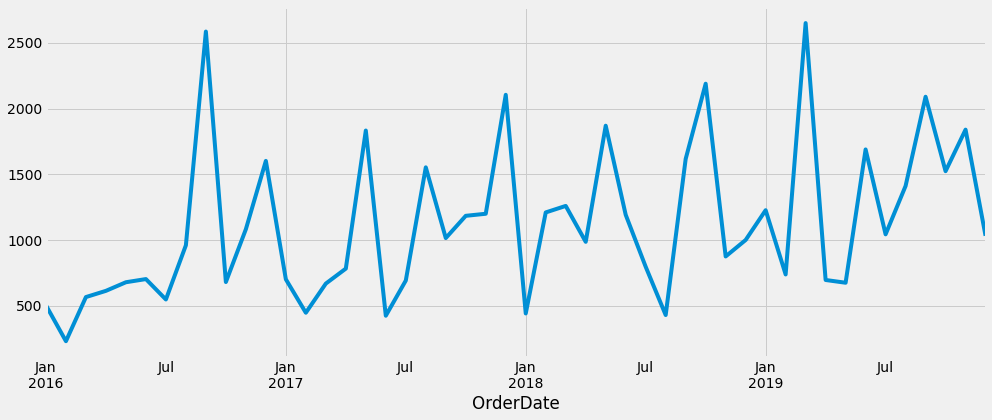

In [ ]:
plt.style.use('fivethirtyeight')
plt.ylabel('Sales'); plt.title('Total Sales')
y.plot(figsize=(15, 6))
plt.show()

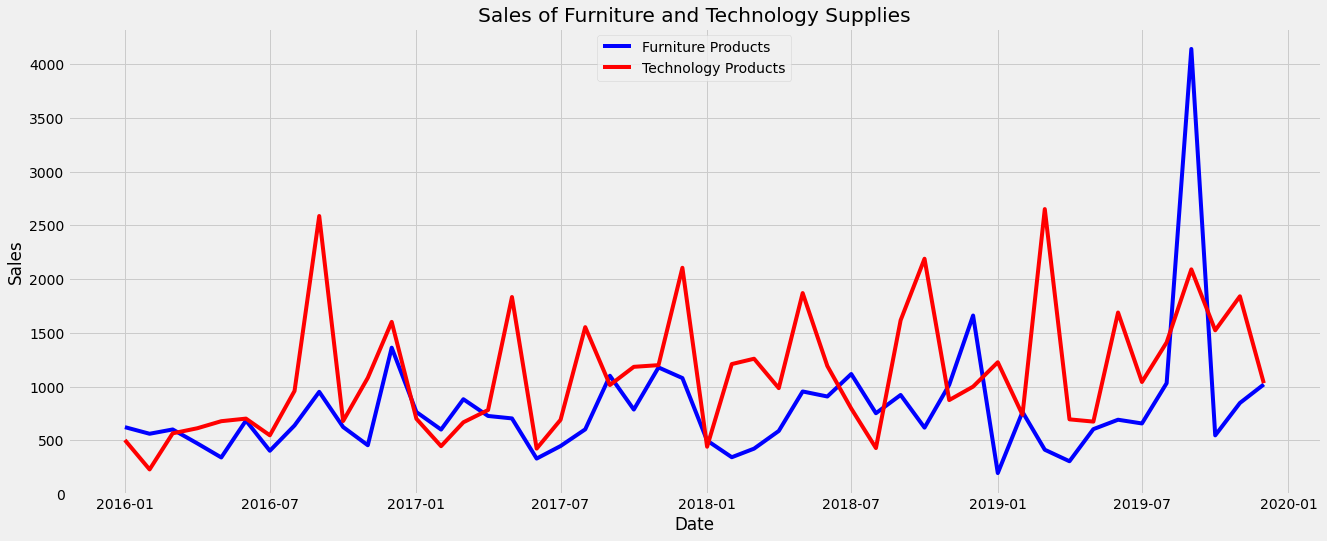

In [ ]:
plt.figure(figsize=(20, 8))
plt.plot(furniture.index, furniture['Target'], 'b-', label = 'Furniture Products')
plt.plot(y.index, y['Target'], 'r-', label = 'Technology Products')
plt.xlabel('Date'); plt.ylabel('Sales'); plt.title('Sales of Furniture and Technology Supplies')
plt.legend(loc='upper center');

The time-series has seasonality pattern, such as sales are always low at the beginning of the year and high at the end of the year. There is always an upward trend within any single year with a couple of low months in the mid of the year.

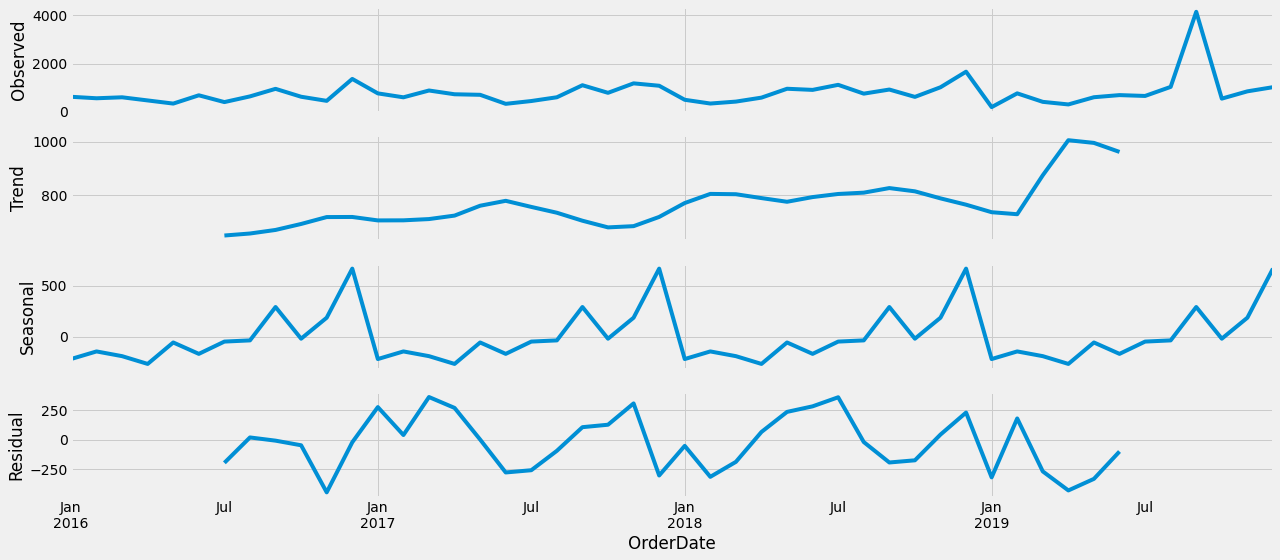

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(furniture, model='additive')
fig = decomposition.plot()
plt.show()

In [ ]:
df=pd.DataFrame(df)

In [ ]:
df=y
#df = df.rename(columns={'Sales':'Target'})

**Creating gateways/checkpoints:**

In [ ]:
#Length of Data
if len(df)<1000:
  length='small'
  print('This data has less than 1000 records and is limited')
else:
  length='big'
  print('This data has over 1000 records')
    
#Stationarity Test

adf = sm.tsa.stattools.adfuller(df.Target) 

if adf[1] < 0.05:
  stationary='true'
  print('Time Series is Stationary')
else:
  stationary='false'
  print('Time Series is not Stationary')

#Skewness Test
#from scipy.stats import skew
#if -0.5<float(skew(df.Target))<0.5:
  skewness = 'insignificant'
  print("Data is fairly symmetrical")
#elif -1<float(skew(df))<0.5 or 0.5<float(skew(df))<1:
  skewness='moderate'
  print("Data is moderately skewed")
#else:
  skewness = 'high'
  print("Data is highly skewed")

#Trend Test
mktest=mk.seasonal_test(df.Target)
if mktest[3] < 0.05:
  trend = 'significant'
  print('Time Series displays significant trend.')
else:
  trend = 'insignificant'
  print('Time Series does not display significant trend.')

#Seasonality Test
#res = sm.tsa.ARMA(df.Target, (1,1)).fit(disp=-1)
#jungbox = sm.stats.acorr_ljungbox(res.resid, lags=[30])
#jungbox = round(np.float(jungbox[1]))
#if jungbox < 0.05:
  #seasonality = 'significant'
  #print('Time Series displays significant seasonality.')
#else:
  #seasonality = 'insignificant'
  #print('Time Series does not display significant seasonality.')

#Null Values
null_values=df.Target.isnull().sum()
null_values=int(null_values)*100/len(df.Target)
if null_values<5:
  null_check = 'insignificant' 
  print('Null values are insignificant')
else:
  null_check = 'significant' 
  print('Null values are significant')

This data has less than 1000 records and is limited
Time Series is Stationary
Time Series does not display significant trend.
Null values are insignificant


In [ ]:
#XGBOOST model
def create_features(df, label=None):
    """
    Creates time series features from datetime index
    """
    df['date'] = df.index
    df['dayofweek'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.weekofyear
    
    X = df[['dayofweek','quarter','month','year',
           'dayofyear','dayofmonth','weekofyear']]
    if label:
        y = df[label]
        return X, y
    return X
train,test = train_test_split(df,test_size=0.2,shuffle=False)
X_train, y_train = create_features(train, label='Target')
X_test, y_test = create_features(test, label='Target')
reg = xgb.XGBRegressor(n_estimators=1000)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
       verbose=False)
xgboost = reg.predict(X_test)
xgboost = pd.DataFrame(xgboost, columns=['xgboost'])
xgboost.index = test.index
#result.to_csv('XGBoost.csv')
#files.download('XGBoost.csv')

[07:22:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
#PMDARIMA
#model = pm.auto_arima(df.Target,m=12,seasonal=True,start_p=0,start_q=0,test='adf',error_action='ignore',suppress_warnings=True,stepwise=True,trace=True)
#model.summary()
#model.fit(train.Target)
#forecast = model.predict(n_periods=len(test))
#forecast = pd.DataFrame(forecast)
#forecast.to_csv('PMDARIMA.csv')
#files.download('PMDARIMA.csv')

In [ ]:
#SARIMAX
"""
Finding optimal parameters
"""
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
best_result=[0,0,1000000]
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train.Target,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            if results.aic<best_result[2]:
              best_result = [param,param_seasonal,results.aic]
        except:
            continue
print('\nBest Result:', best_result)

#Build model, fit and predict
mod = sm.tsa.statespace.SARIMAX(train.Target, order=(best_result[0][0], best_result[0][1], best_result[0][1]),
                                seasonal_order=(best_result[1][0], best_result[1][1], best_result[1][2], best_result[1][3]),
                                enforce_stationarity=False, enforce_invertibility=False)
results = mod.fit()
print(results.summary())
sarimax = results.predict(start = len(train), end = len(df) - 1, type = 'levels')
sarimax = pd.DataFrame(sarimax, columns=['sarimax'])
sarimax.index = test.index
#result.to_csv('SARIMAX.csv')
#files.download('SARIMAX.csv')

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:630.3928621383316
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1126.2339288361695
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:398.50901576823276
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:414.81279300282927
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:400.15164864441454
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:224.23795712138266
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:596.8296012327182
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1999.166582001943
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:383.5243381393548
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:415.6075394831947
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:388.6179022875732
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:226.2371547229159
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:583.3978913370751
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:nan
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:405.1454444878571
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:405.50257039759924
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:nan
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:217.78440558277867
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 

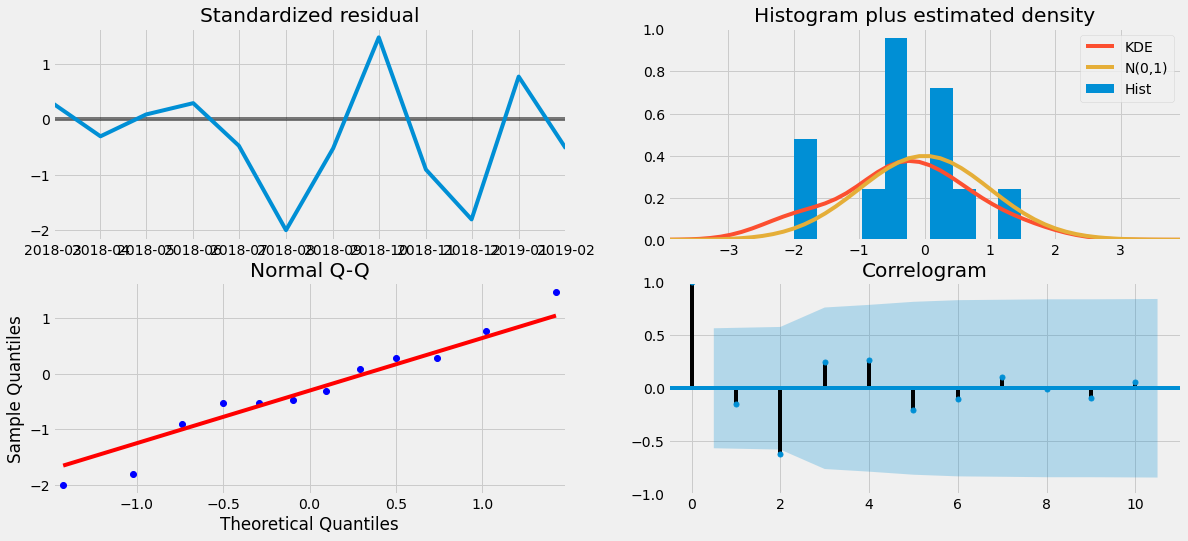

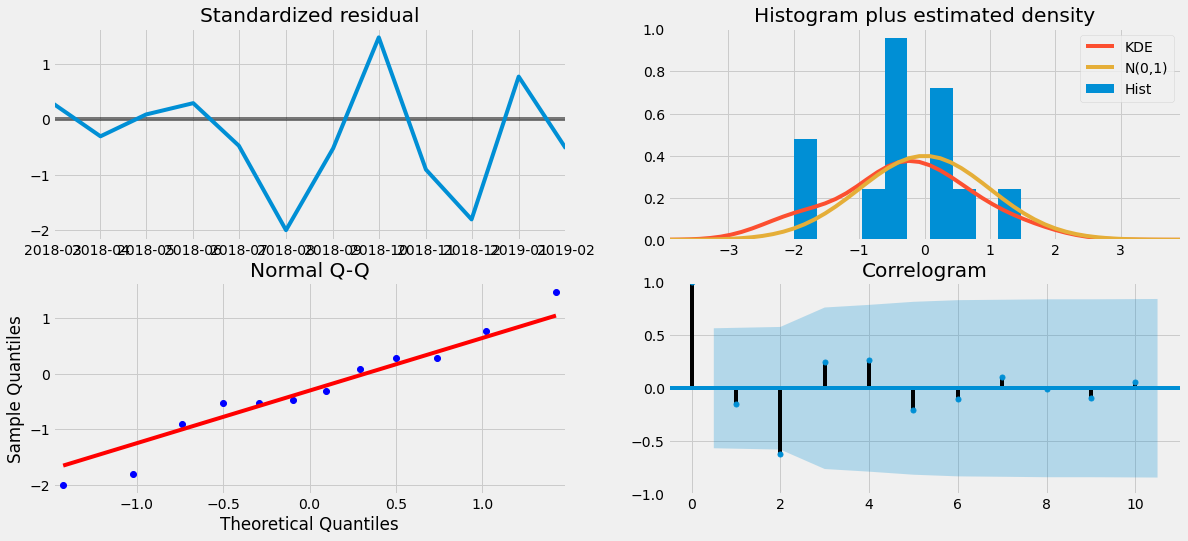

In [ ]:
results.plot_diagnostics()

In [ ]:
#LSTM
#Scale data for LSTM
scaler=MinMaxScaler(feature_range=(0,1))
df_scaled=scaler.fit_transform(np.array(df.Target).reshape(-1,1))
features=df_scaled
target=df_scaled[:,0]
#Utility class to produce batches for training/validation 
TimeseriesGenerator(features, target, length=2, 
                    sampling_rate=1, batch_size=1)[0]
x_train, x_test, y_train, y_test = train_test_split(features, 
                                                    target, test_size=0.20, random_state=123, shuffle = False)
win_length=1
batch_size=64
num_features=1
train_generator = TimeseriesGenerator(x_train, y_train, 
                                      length=win_length, sampling_rate=1, batch_size=batch_size)
test_generator = TimeseriesGenerator(x_test, y_test, 
                                     length=win_length, sampling_rate=1, batch_size=batch_size)
#Build model, fit and predict
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape = (win_length, num_features)))
model.add(Dropout(0.2))
model.add(LSTM(50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss=tf.losses.MeanSquaredError(),
              optimizer=tf.optimizers.Adam(),metrics=[tf.metrics.MeanAbsoluteError()])
history = model.fit(train_generator, epochs=50, validation_data=test_generator,shuffle=False)
predictions=model.predict(test_generator)
x_test[:,1:][win_length:]
df_pred=pd.concat([pd.DataFrame(predictions), pd.DataFrame(x_test[:,1:][win_length:])],axis=1)
#Inverse transform the scaled data
rev_trans=scaler.inverse_transform(df_pred)
df_final=df[predictions.shape[0]*-1:]
df_final['lstm']=rev_trans[:,0]
lstm=df_final.drop(['Target'], axis=1)

Epoch 1/50
1/1 [==============================] - 6s 6s/step - loss: 0.1642 - mean_absolute_error: 0.3366 - val_loss: 0.2426 - val_mean_absolute_error: 0.4521
Epoch 2/50
1/1 [==============================] - 0s 52ms/step - loss: 0.1620 - mean_absolute_error: 0.3335 - val_loss: 0.2395 - val_mean_absolute_error: 0.4486
Epoch 3/50
1/1 [==============================] - 0s 52ms/step - loss: 0.1598 - mean_absolute_error: 0.3303 - val_loss: 0.2364 - val_mean_absolute_error: 0.4451
Epoch 4/50
1/1 [==============================] - 0s 58ms/step - loss: 0.1575 - mean_absolute_error: 0.3272 - val_loss: 0.2332 - val_mean_absolute_error: 0.4416
Epoch 5/50
1/1 [==============================] - 0s 55ms/step - loss: 0.1551 - mean_absolute_error: 0.3238 - val_loss: 0.2300 - val_mean_absolute_error: 0.4379
Epoch 6/50
1/1 [==============================] - 0s 51ms/step - loss: 0.1532 - mean_absolute_error: 0.3208 - val_loss: 0.2268 - val_mean_absolute_error: 0.4342
Epoch 7/50
1/1 [====================

In [ ]:
#FB Prophet Model
m=Prophet()
df1=df
#Transform date column as 'ds' and target as 'y'
df1['ds'] =  df1.index
df1 = df1.rename(columns={'Target':'y'})
train_fb,test_fb = train_test_split(df1,test_size=0.2,shuffle=False)
#Fit model and predict
m.fit(train_fb)
prediction_dates = m.make_future_dataframe(periods=len(test_fb)+1,freq='MS')
prediction = m.predict(prediction_dates)
prediction.set_index('ds',inplace=True)
fbprophet = prediction['yhat']
fbprophet=fbprophet.loc[test_fb.index[0]:test_fb.index[-1],]
fbprophet=pd.DataFrame(fbprophet)
fbprophet = fbprophet.rename(columns={'yhat':'fbprophet'})
#fbprophet.to_csv('FBProphet.csv')
#files.download('FBProphet.csv')

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
test_or

,Target,ds
OrderDate,,
2019-03-01,2651.250000,2019-03-01
2019-04-01,695.642857,2019-04-01
2019-05-01,674.750000,2019-05-01
2019-06-01,1689.368421,2019-06-01
2019-07-01,1043.095238,2019-07-01
2019-08-01,1411.388889,2019-08-01
2019-09-01,2090.625000,2019-09-01
2019-10-01,1523.857143,2019-10-01
2019-11-01,1840.160000,2019-11-01


In [ ]:
#Creating dataframe with all model predictions and calculating error value
test_or['xgboost']= xgboost
test_or['sarimax']= sarimax
test_or['lstm']= lstm
test_or['fbprophet']= fbprophet
columns = {'xgboost','sarimax','lstm','fbprophet'}
for i in columns:
  free=pd.notnull(test_or[i])
  test_or[free]
  #if test_or[i].isnull()
  print('RMSE of', i , mean_squared_error(test_or[free].Target,
                                          test_or[free][i],squared=False))


RMSE of xgboost 791.9652505084131
RMSE of lstm 527.718081295982
RMSE of sarimax 769.5232178640236
RMSE of fbprophet 1011.373047896253


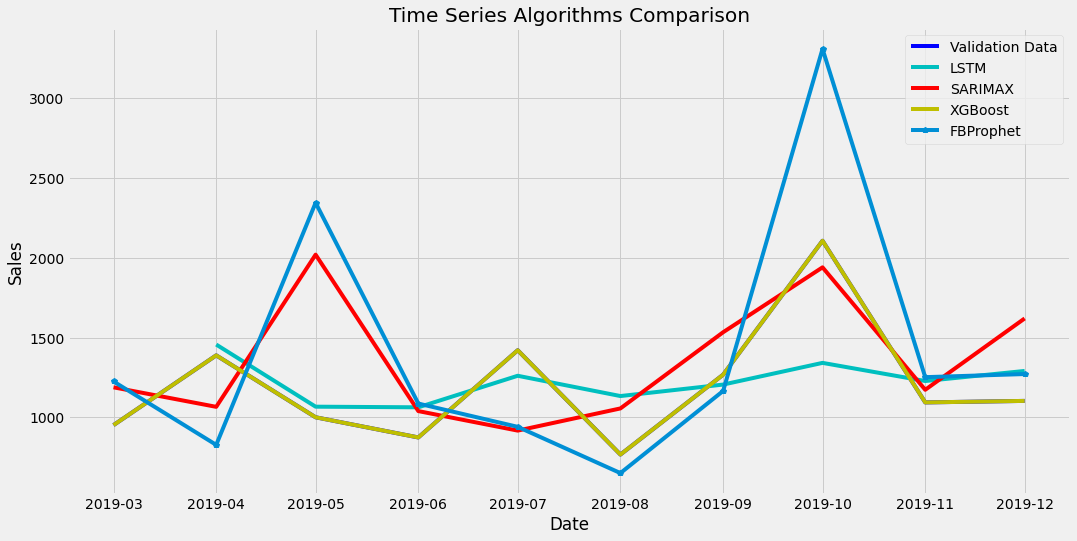

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(test_or.index, test_or.xgboost, 'b-', label = 'Validation Data')
plt.plot(test_or.index, test_or.lstm, 'c-', label = 'LSTM')
plt.plot(test_or.index, test_or.sarimax, 'r-', label = 'SARIMAX')
plt.plot(test_or.index, test_or.xgboost, 'y-', label = 'XGBoost')
plt.plot(test_or.index, test_or.fbprophet, 'p-', label = 'FBProphet')
plt.xlabel('Date'); plt.ylabel('Sales'); plt.title('Time Series Algorithms Comparison')
plt.legend(loc='upper right');

In [ ]:
#Ensemble Prediction
if length == 'small' and trend == 'insignificant': 
  forecast = test_or.sarimax*2/5+test_or.xgboost*3/5
  print(forecast)
elif length == 'big' and trend == 'insignificant' and seasonality == 'significant' :
  forecast = (test_or.xgboost+test_or.fbprophet+test_or.lstm)/3
  print(forecast)
elif length=='big' and trend=='significant' and seasonality =='insignificant':
  forecast == test_or.sarimax*3/5 +test_or.lstm*2/5
  print(forecast)
else:
  forecast = (test_or.xgboost + test_or.sarimax + test_or.fbprophet + test_or.lstm)/5

Date
1989-01-01          NaN
1989-01-02    15.098211
1989-01-03    15.902129
1989-01-04    16.182786
1989-01-05    15.737969
                ...    
1990-12-27    14.787174
1990-12-28    14.677146
1990-12-29    14.589954
1990-12-30    14.858042
1990-12-31    15.187118
Length: 730, dtype: float64
